In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
import pandas as pd

In [5]:
data_set = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [6]:
data_set

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data_set.columns.value_counts().sum()

9

In [8]:
data_set.shape

(768, 9)

In [9]:
data_set.isna().sum()

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
bmi          0
pedigree     0
age          0
diabetes     0
dtype: int64

In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
X = data_set.values[:,:8]
y = data_set.values[:,8]

In [34]:
# 꼭 확인해야 된다.
X.dtype

dtype('float64')

In [35]:
X.shape

(768, 8)

In [50]:
data_set['diabetes'].value_counts()


diabetes
False    500
True     268
Name: count, dtype: int64

In [97]:

data_set[(data_set['diabetes'].astype(int) == 1)]['diabetes'].sum()

268

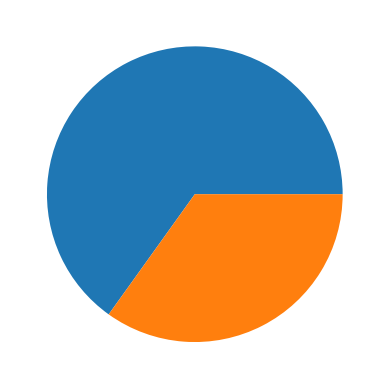

In [47]:
import matplotlib.pyplot as plt
plt.pie(data_set['diabetes'].value_counts())
plt.show()

In [56]:
data_set.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
data_set.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [64]:
import seaborn as sns


In [68]:
colormap = plt.cm.gist_heat

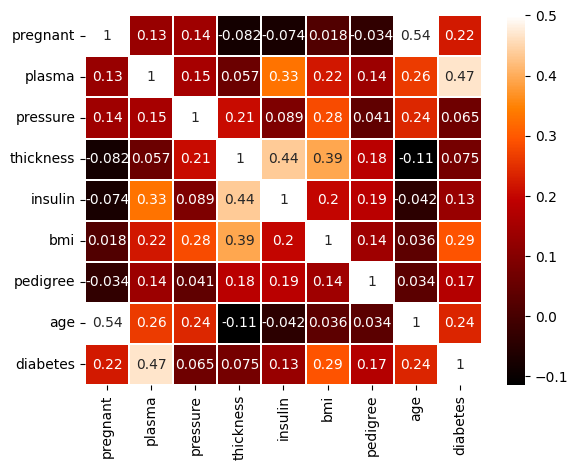

In [71]:

sns.heatmap(data_set.corr(), linewidths=0.1, vmax=0.5,
            cmap = colormap, linecolor='white', annot=True)
plt.show()


In [72]:
# 주요변수 추출 :  plasma(), bmi (체질량 지수)


In [73]:
# 공복 혈당 농도에 따라, 당뇨병인 사람과 아닌 사람의 분포를 보자!!


In [75]:
data_set['diabetes']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [76]:
data_set['plasma']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

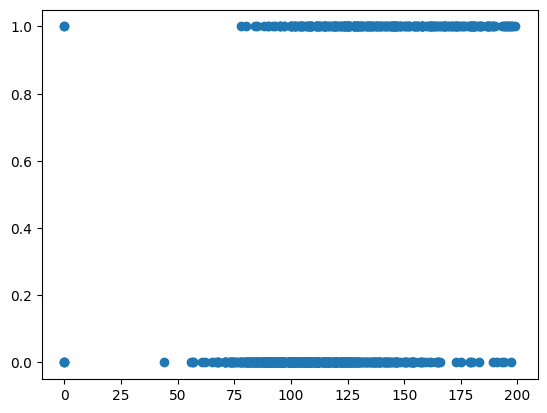

In [81]:
plt.plot(data_set['plasma'], data_set['diabetes'], 'o')
plt.show()

In [103]:
data_set[(data_set['diabetes'].astype(int) == 1)]['diabetes'].sum()
data_set[data_set['diabetes'].astype(int)==0].diabetes.value_counts()

diabetes
0    500
Name: count, dtype: int64

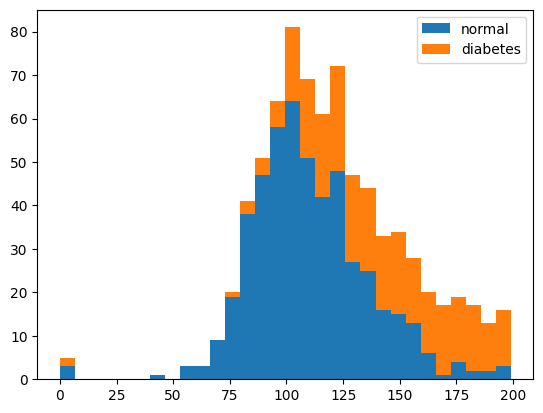

In [90]:
plt.hist(x=[data_set.plasma[data_set['diabetes'] == 0],
            data_set.plasma[data_set['diabetes'] == 1]], 
            bins=30,
            histtype='barstacked',
            label=['normal', 'diabetes'])    
plt.legend()
plt.show()

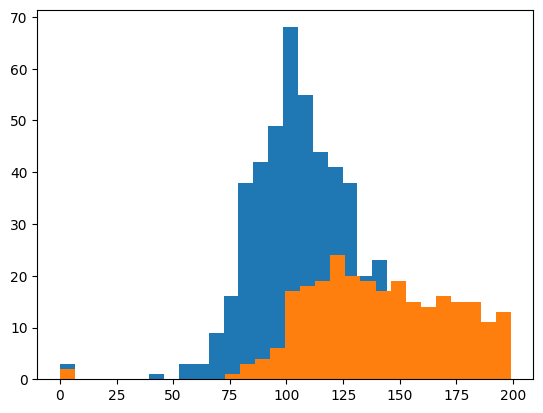

In [88]:
plt.hist([data_set['plasma'][data_set['diabetes'] == 0]], bins=30)   
plt.hist([data_set['plasma'][data_set['diabetes'] == 1]], bins=30)  
plt.show()

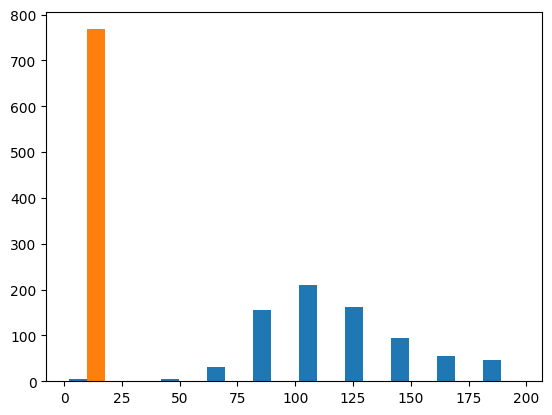

In [85]:

plt.hist([data_set['plasma'], data_set['diabetes']], bins=10)   
plt.show()

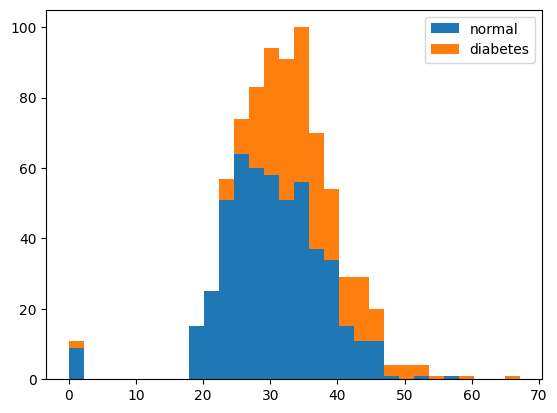

In [95]:
plt.hist(x=[data_set.bmi[data_set.diabetes == 0],
            data_set.bmi[data_set.diabetes == 1]], 
            bins=30,
            histtype='barstacked',
            label=['normal', 'diabetes'])    
plt.legend()
plt.show()

In [93]:
data_set.bmi[data_set['diabetes'] == 0]

1      26.6
3      28.1
5      25.6
7      35.3
10     37.6
       ... 
762    22.5
763    32.9
764    36.8
765    26.2
767    30.4
Name: bmi, Length: 500, dtype: float64